In [2]:
!pip install geopandas

     |████████████████████████████████| 931kB 75kB/s eta 0:00:011
     |████████████████████████████████| 14.7MB 278kB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 218kB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 131kB/s eta 0:00:01


In [3]:
import pandas as pd
import numpy as np
import datetime
import requests
import warnings
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import squarify
import plotly.offline as py
import plotly_express as px

%matplotlib inline

In [ ]:


# import shapefile as shp  # Requires the pyshp package
# import matplotlib.pyplot as plt
# lsoas = gpd.read_file("IND_adm/IND_adm3.shp")

# fig, ax = plt.subplots(1, figsize=(20, 12))
# ax.axis("off")

# ax.set_title('Covid-19 Statewise Data — Confirmed Cases', 
#              fontdict =  {"fontsize": "25", "fontweight" : "3"})

# # merged_data.plot(column = "Confirmed", cmap="YlOrRd", 
# #                  linewidth=0.8, ax=ax, edgecolor="0", 
# #                  legend = True)


# lsoas.plot(ax=ax)
# plt.show()



In [4]:
age_details = pd.read_csv('New_Data/AgeGroupDetails.csv')
india_covid_19 = pd.read_csv('New_Data/covid_19_india.csv')
hospital_beds = pd.read_csv('New_Data/HospitalBedsIndia.csv')
individual_details = pd.read_csv('New_Data/IndividualDetails.csv')
ICMR_details = pd.read_csv('New_Data/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('New_Data/ICMRTestingLabs.csv')
state_testing = pd.read_csv('New_Data/StatewiseTestingDetails.csv')

In [5]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')
india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'])
state_testing['Date'] = pd.to_datetime(state_testing['Date'])

In [6]:
state_details = pd.pivot_table(india_covid_19, values=['ConfirmedForeignNational','ConfirmedIndianNational','Confirmed','Deaths','Cured'], index='State/UnionTerritory', aggfunc='max')
state_details = state_details.sort_values(by='Confirmed', ascending= False)

state_details["Total"] = state_details.Confirmed + state_details.Cured + state_details.Deaths

state_details["States/UT"] = state_details.index
state_details.sort_values(by=['States/UT'],inplace =True)
state_details.head()

,Confirmed,ConfirmedForeignNational,ConfirmedIndianNational,Cured,Deaths,Total,States/UT
State/UnionTerritory,,,,,,,
Andaman and Nicobar Islands,33,0,6,32,0,65,Andaman and Nicobar Islands
Andhra Pradesh,1717,0,9,589,36,2342,Andhra Pradesh
Arunachal Pradesh,1,-,-,1,0,2,Arunachal Pradesh
Assam,43,-,-,32,1,76,Assam
Bihar,529,0,9,130,4,663,Bihar


In [7]:
map_data = gpd.read_file("./India_Shape_File/Indian_States.shp")
map_data.rename(columns = {"st_nm":"States/UT"}, inplace = True)
map_data.head()

,States/UT,geometry
0,Andaman & Nicobar Island,(POLYGON ((93.71975948121514 7.207067636262479...
1,Arunanchal Pradesh,"POLYGON ((96.16260946675357 29.38078474502004,..."
2,Assam,"(POLYGON ((89.74322932956994 26.3036203411059,..."
3,Bihar,(POLYGON ((84.50719832504274 24.26323103208654...
4,Chandigarh,"POLYGON ((76.84147287327454 30.75995934035132,..."


In [8]:
map_data["States/UT"] = map_data["States/UT"].str.replace("&","and")

In [9]:
map_data["States/UT"].replace("Arunanchal Pradesh", "Arunachal Pradesh", inplace = True)
map_data["States/UT"].replace("Telangana", "Telengana", inplace = True)
map_data["States/UT"].replace("NCT of Delhi",  "Delhi", inplace = True)
map_data['States/UT'].replace('Andaman and Nicobar Island', 'Andaman and Nicobar Islands',inplace = True)

In [10]:
merged_data = pd.merge(map_data, state_details, how = "left", on = "States/UT")

merged_data.fillna(0, inplace = True)

In [12]:
!pip install descartes

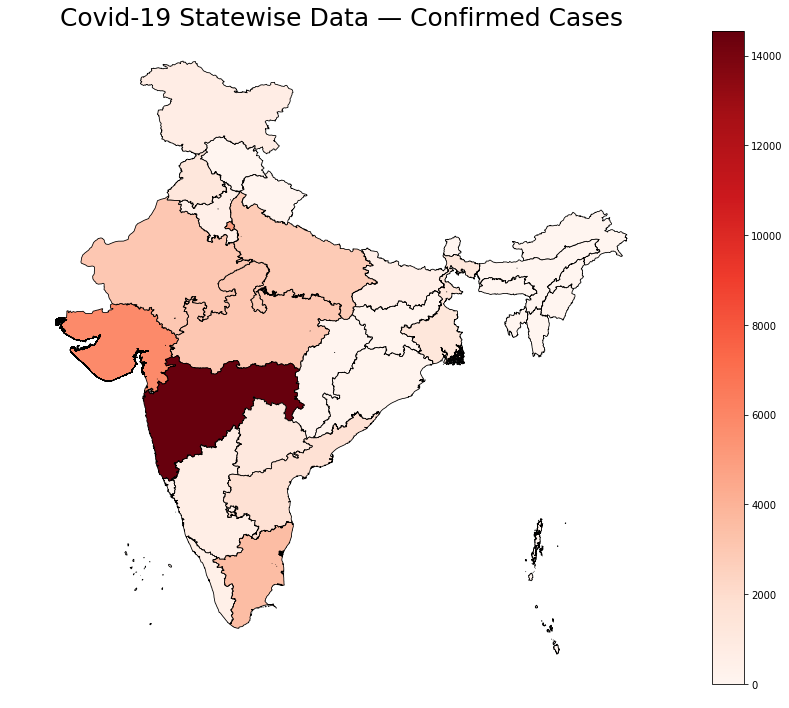

In [36]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis("off")

ax.set_title('Covid-19 Statewise Data — Confirmed Cases', 
             fontdict =  {"fontsize": "25", "fontweight" : "3"})

merged_data.plot(column = "Confirmed", cmap="Reds", 
                 linewidth=0.8, ax=ax, edgecolor="0", 
                 legend = True)
plt.show()

In [37]:
merged_data["ConfirmedIndianNational"].replace('-','0',inplace=True)
merged_data["ConfirmedIndianNational"] = merged_data["ConfirmedIndianNational"].apply(int)

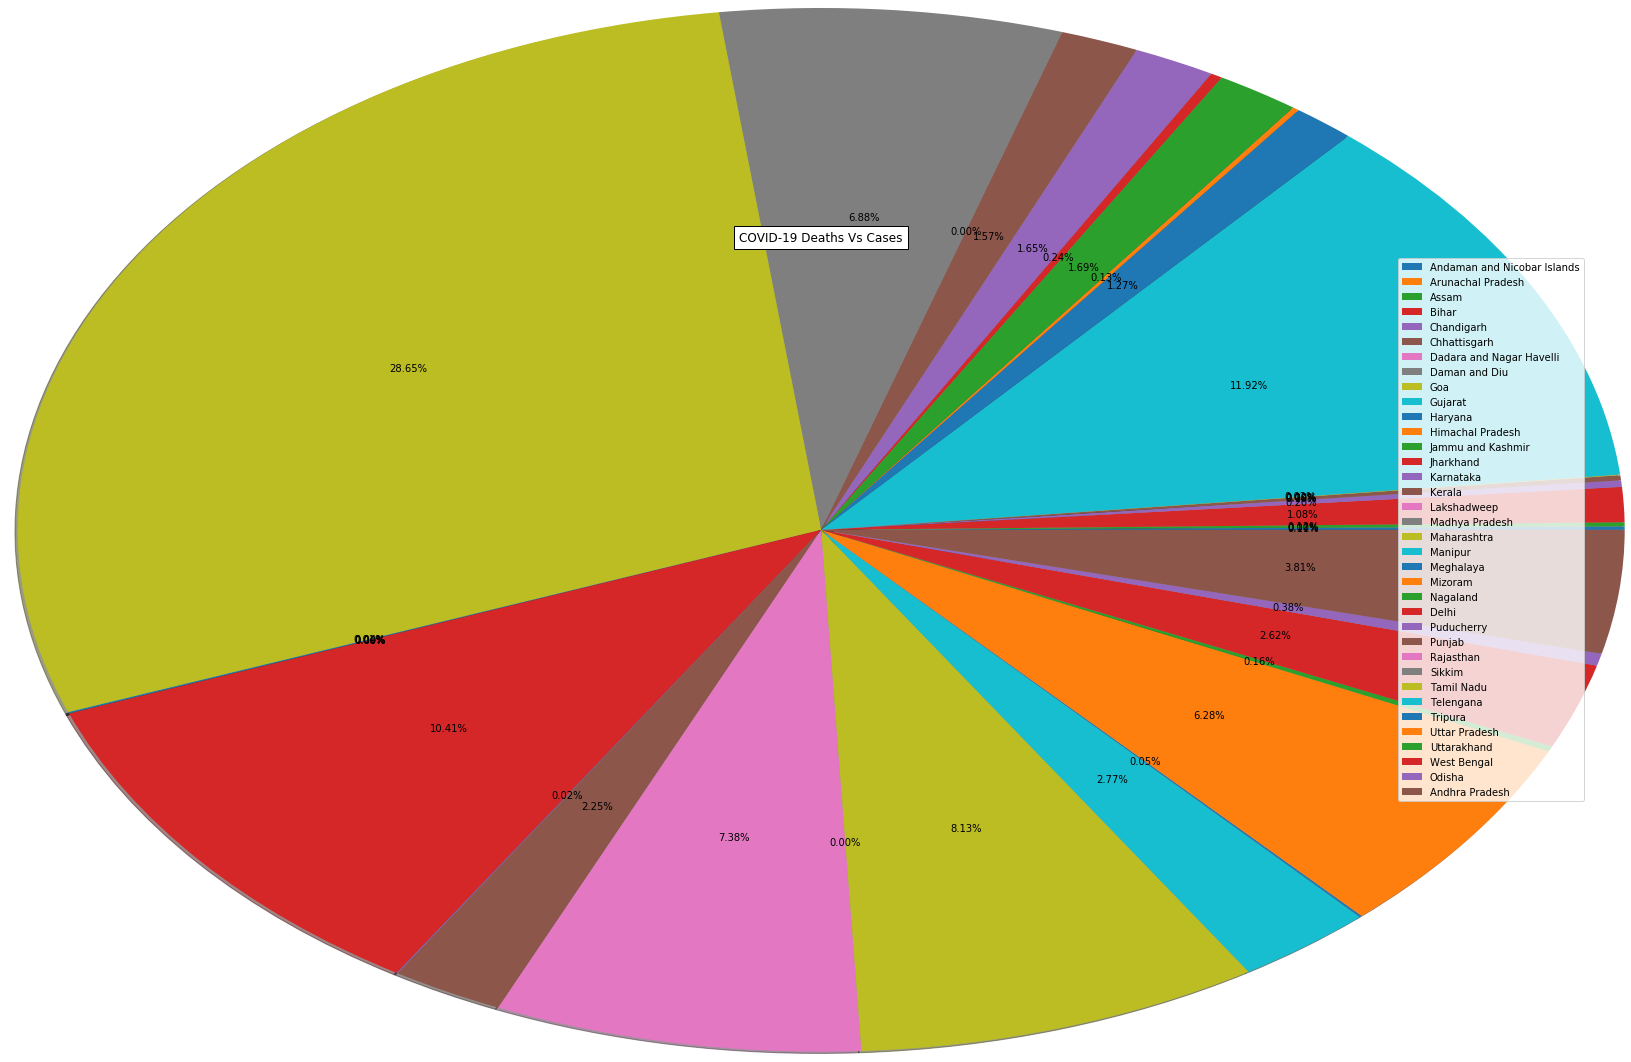

In [38]:
state = merged_data["States/UT"]
cases = merged_data["Total"]

# explode = merged_data.ConfirmedIndianNational.apply(lambda x:x > 100)
# explode = explode.apply(lambda x:0.2 if x == True else 0)

plt.title("COVID-19 Deaths Vs Cases", bbox={"facecolor":"1", "pad":5}).set_position([.5,1.8])
plt.pie(cases,autopct="%1.2f%%",shadow=True, radius=6,)
plt.legend(state, loc="center",bbox_to_anchor=(2.5, 0.5))
plt.show()

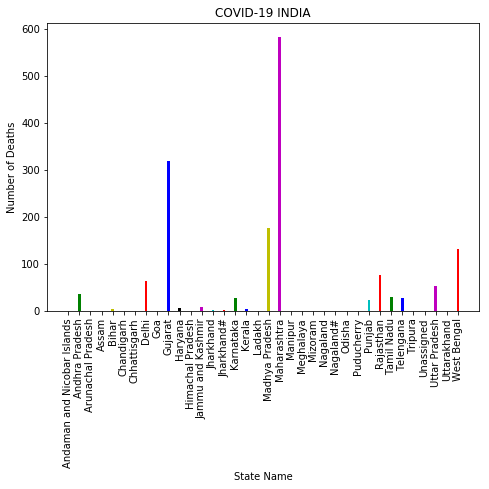

In [39]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(state_details["States/UT"],state_details["Deaths"], color = list("rgbkymc"), width = 0.25)
plt.title("COVID-19 INDIA")
plt.xticks(rotation=90)
plt.xlabel("State Name")
plt.ylabel("Number of Deaths")
plt.show()